# **Prepare**

In [ ]:
cd drive/MyDrive/DL

/content/drive/MyDrive/DL


In [ ]:
! git clone https://github.com/Masao-Taketani/StarGAN-tf2

Cloning into 'StarGAN-tf2'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 205 (delta 117), reused 129 (delta 49), pack-reused 0
Receiving objects: 100% (205/205), 7.11 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
cd Project/StarGAN-tf2

/content/drive/MyDrive/DL/Project/StarGAN-tf2


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 679 kB 8.3 MB/s 


In [ ]:
!rm -rf "data/celeba/images"

# **Download dataset**

In [ ]:
!bash download.sh celeba

Streaming output truncated to the last 5000 lines.
  inflating: ./data/celeba/images/195339.jpg  
  inflating: ./data/celeba/images/012465.jpg  
  inflating: ./data/celeba/images/089057.jpg  
  inflating: ./data/celeba/images/147796.jpg  
  inflating: ./data/celeba/images/192463.jpg  
  inflating: ./data/celeba/images/142818.jpg  
  inflating: ./data/celeba/images/148061.jpg  
  inflating: ./data/celeba/images/184432.jpg  
  inflating: ./data/celeba/images/201157.jpg  
  inflating: ./data/celeba/images/097288.jpg  
  inflating: ./data/celeba/images/130371.jpg  
  inflating: ./data/celeba/images/082864.jpg  
  inflating: ./data/celeba/images/017429.jpg  
  inflating: ./data/celeba/images/186077.jpg  
  inflating: ./data/celeba/images/126843.jpg  
  inflating: ./data/celeba/images/200381.jpg  
  inflating: ./data/celeba/images/012555.jpg  
  inflating: ./data/celeba/images/092238.jpg  
  inflating: ./data/celeba/images/008151.jpg  
  inflating: ./data/celeba/images/171418.jpg  
  inflati

In [ ]:
with open("data/celeba/list_attr_celeba.txt", "r") as f:
    lines = f.readlines()
    
n = 30002
i = 0
with open("data/celeba/list_attr_celeba.txt", "w") as f:
    for line in lines:
        f.write(line)
        i += 1
        if i == n:
            break

# **VGG model and Prepare dataset for VGG**

In [ ]:
def is_digit(n):
    try:
        int(n)
        return True
    except ValueError:
        return  False

In [ ]:
datas = []

with open("data/celeba/list_attr_celeba 10000 data.txt", "r") as f:
    lines = f.readlines()

    print(lines[1].split(" ")[39])
    print(lines[1].split(" ")[20])
    print(lines[1].split(" ")[11])
    print(lines[1].split(" ")[9])
    print(lines[1].split(" ")[8])

    mynewlist = [s for s in lines[2].split(" ") if is_digit(s)]

    print(mynewlist)

    print(mynewlist[39][0])
    print(mynewlist[20])
    print(mynewlist[11])
    print(mynewlist[9])
    print(mynewlist[8])

    counter = 0

    for line in lines:

      if counter >1:

        mynewlist = [s for s in line.split(" ") if is_digit(s)]

        address = line.split(" ")[0]

        young = mynewlist[39].split("\n")[0]
        male = mynewlist[20]
        brown_hair = mynewlist[11]
        blond_hair = mynewlist[9]
        black_hair = mynewlist[8]

        datas.append((black_hair,blond_hair,brown_hair,male,young, "data/celeba/images" + '/' + address))

      counter += 1



Young
Male
Brown_Hair
Blond_Hair
Black_Hair
['-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1\n']
1
-1
1
-1
-1


In [ ]:
print(datas[0])

('-1', '-1', '1', '-1', '1', 'data/celeba/images/000001.jpg')


In [ ]:
import cv2
import numpy as np

img_size = 256
def get_data(datas):

    labels = []
    images = [] 

    for data in datas:
      label = data[:5]
      [int(x) for x in label]
      labels.append(label)
      img = cv2.imread(data[5])[...,::-1]
      resized_img = cv2.resize(img, (img_size, img_size))
      images.append(resized_img)


    return (np.array(labels),np.array(images))

In [ ]:
labels = []
images = []
labels,images = get_data(datas)

In [ ]:
for j in range(len(labels)):
  for i in range(len(labels[j])):
    if labels[j][i] == "-1":
      labels[j][i] = 0
    else:
      labels[j][i] = 1

In [ ]:
int_labels = []
for j in range(len(labels)):
  int_labels.append([])
  for i in range(len(labels[j])):
    
    int_labels[-1].append(int(labels[j][i]))


In [ ]:
print(int_labels[5050])

[0, 1, 0, 0, 0]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

x = base_model.output

x = Flatten()(x)

x = Dense(64, activation='relu')(x)

output = Dense(5, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [ ]:
int_labels = np.array(int_labels)


In [ ]:
model.fit(x = images, y = int_labels,validation_split = 0.1, batch_size = 32 , epochs = 20 , verbose = 1)

Epoch 1/20
282/282 [==============================] - 186s 510ms/step - loss: 0.8604 - accuracy: 0.1887 - val_loss: 0.4818 - val_accuracy: 0.2120
Epoch 2/20
282/282 [==============================] - 142s 503ms/step - loss: 0.4441 - accuracy: 0.2593 - val_loss: 0.4285 - val_accuracy: 0.2670
Epoch 3/20
282/282 [==============================] - 142s 503ms/step - loss: 0.4024 - accuracy: 0.2887 - val_loss: 0.4068 - val_accuracy: 0.2800
Epoch 4/20
282/282 [==============================] - 142s 503ms/step - loss: 0.3703 - accuracy: 0.3205 - val_loss: 0.3829 - val_accuracy: 0.3210
Epoch 5/20
282/282 [==============================] - 142s 503ms/step - loss: 0.3473 - accuracy: 0.3434 - val_loss: 0.3459 - val_accuracy: 0.3490
Epoch 6/20
282/282 [==============================] - 142s 503ms/step - loss: 0.3264 - accuracy: 0.3677 - val_loss: 0.3267 - val_accuracy: 0.4100
Epoch 7/20
282/282 [==============================] - 142s 503ms/step - loss: 0.3127 - accuracy: 0.3904 - val_loss: 0.3199 -

In [ ]:
model.save('vgg-sigmoid.h5')

# **Create tfrecords**

In [ ]:
!python data_loader.py

2021-07-19 12:53:16.876489: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
train len: 28001
test len: 1999
2021-07-19 12:53:20.752448: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 12:53:20.819974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-19 12:53:20.820639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-19 12:53:20.820717: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-19 12:53:20.945771: I tensorflow/

In [ ]:
ls data/celeba/images/006199.jpg

data/celeba/images/006199.jpg


In [ ]:
ls data/celeba/images/192753.jpg

data/celeba/images/192753.jpg


# **Train**

In [ ]:
!python train.py

2021-07-19 12:54:15.268934: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-19 12:54:17.191602: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 12:54:17.219589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-19 12:54:17.220250: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-19 12:54:17.220305: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-19 12:54:17.236324: I tensorflow/stream_executor/platform/default

# **Test**

In [ ]:
from utils import get_models_for_testing, test_image

In [ ]:
# Load trained models
gen, _ = get_models_for_testing()

Check Generator's model architecture
Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf.reshape (TFOpLambda)         (None, 1, 1, 5)      0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.cast (TFOpLambda)            (None, 1, 1, 5)      0           tf.reshape[0][0]                 
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
_____________________________________________________

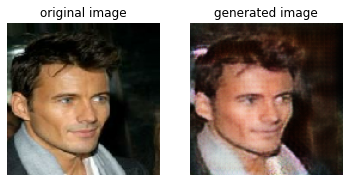

In [ ]:
img_path = "data/celeba/images/001106.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

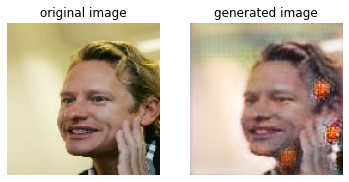

In [ ]:
img_path = "data/celeba/images/001342.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

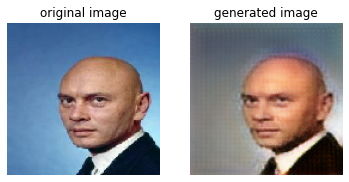

In [ ]:
img_path = "data/celeba/images/001519.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

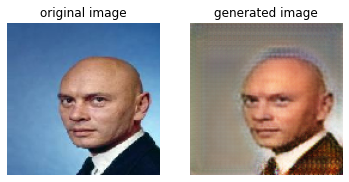

In [ ]:
img_path = "data/celeba/images/001519.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

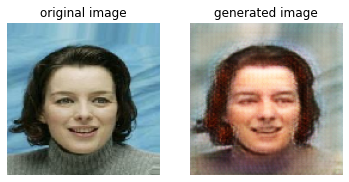

In [ ]:
img_path = "data/celeba/images/000176.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

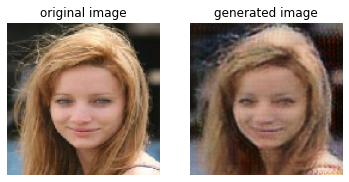

In [ ]:
img_path = "data/celeba/images/003223.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

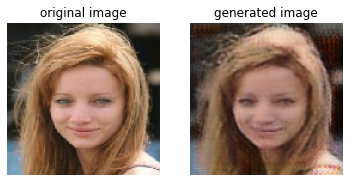

In [ ]:
img_path = "data/celeba/images/003223.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

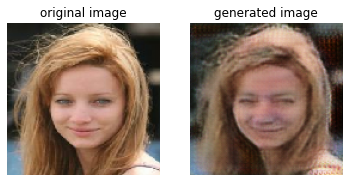

In [ ]:
img_path = "data/celeba/images/003223.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

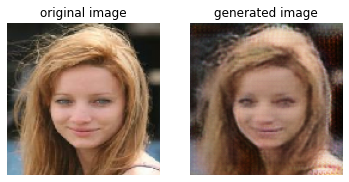

In [ ]:
img_path = "data/celeba/images/003223.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

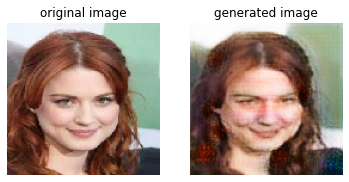

In [ ]:
img_path = "data/celeba/images/001013.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

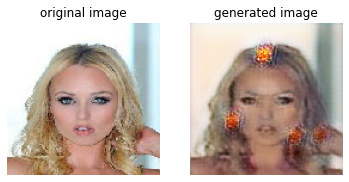

In [ ]:
img_path = "data/celeba/images/003354.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

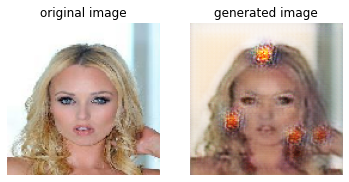

In [ ]:
img_path = "data/celeba/images/003354.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

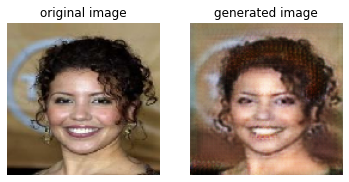

In [ ]:
img_path = "data/celeba/images/005512.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

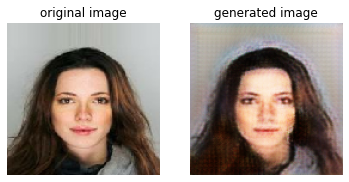

In [ ]:
img_path = "data/celeba/images/101167.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

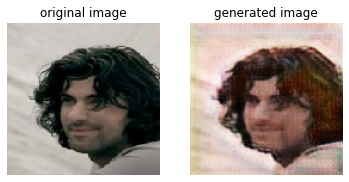

In [ ]:
img_path = "data/celeba/images/168835.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

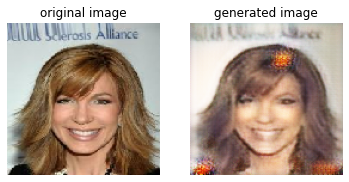

In [ ]:
img_path = "data/celeba/images/202559.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

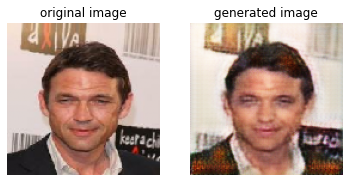

In [ ]:
img_path = "data/celeba/images/101273.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

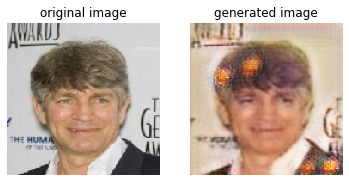

In [ ]:
img_path = "data/celeba/images/067518.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

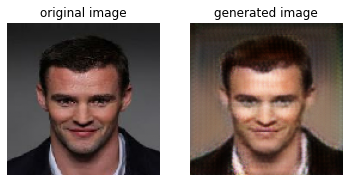

In [ ]:
img_path = "data/celeba/images/134861.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

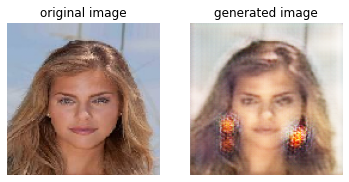

In [ ]:
img_path = "data/celeba/images/101115.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

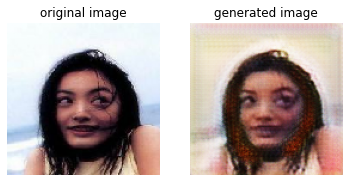

In [ ]:
img_path = "data/celeba/images/101118.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

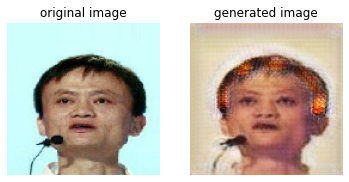

In [ ]:
img_path = "data/celeba/images/101120.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

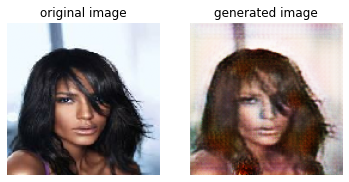

In [ ]:
img_path = "data/celeba/images/101164.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

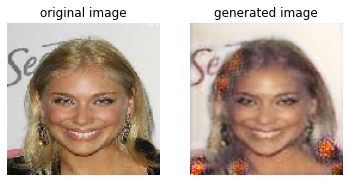

In [ ]:
img_path = "data/celeba/images/101147.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

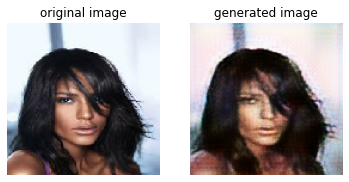

In [ ]:
img_path = "data/celeba/images/101164.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

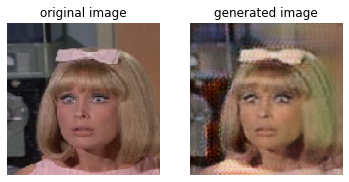

In [ ]:
img_path = "data/celeba/images/101254.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

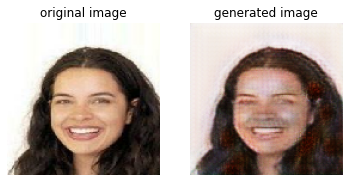

In [ ]:
img_path = "data/celeba/images/101731.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

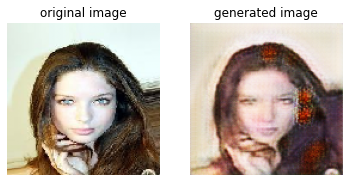

In [ ]:
img_path = "data/celeba/images/101321.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)